[403.53239437]
[2.6 0.  0.9 3.  0.  4.  0.7 0.3 0.8 0.  2.2 3.6 3.6 7.2 0.  6.1 1.2 1.4
 3.  0.  0.2 0.  0.  1.8 1.8 0.  0.7 0.  1.1 1.2 0.  4.9 0.  0.  3.6 0.
 0.1 0.2 0.  0.9 0.  4.7 4.8 0.  3.2 0.  0.4 0.4 0.  2.  7.8 0.  5.9 0.
 7.5 2.4 0.  0.  3.  1.5 0.2 1.3 0.  0.2 0.1 0.1 0.6 0.  2.5 1.3]
1.5285714285714278
[407.59774391]
[399.46704482]


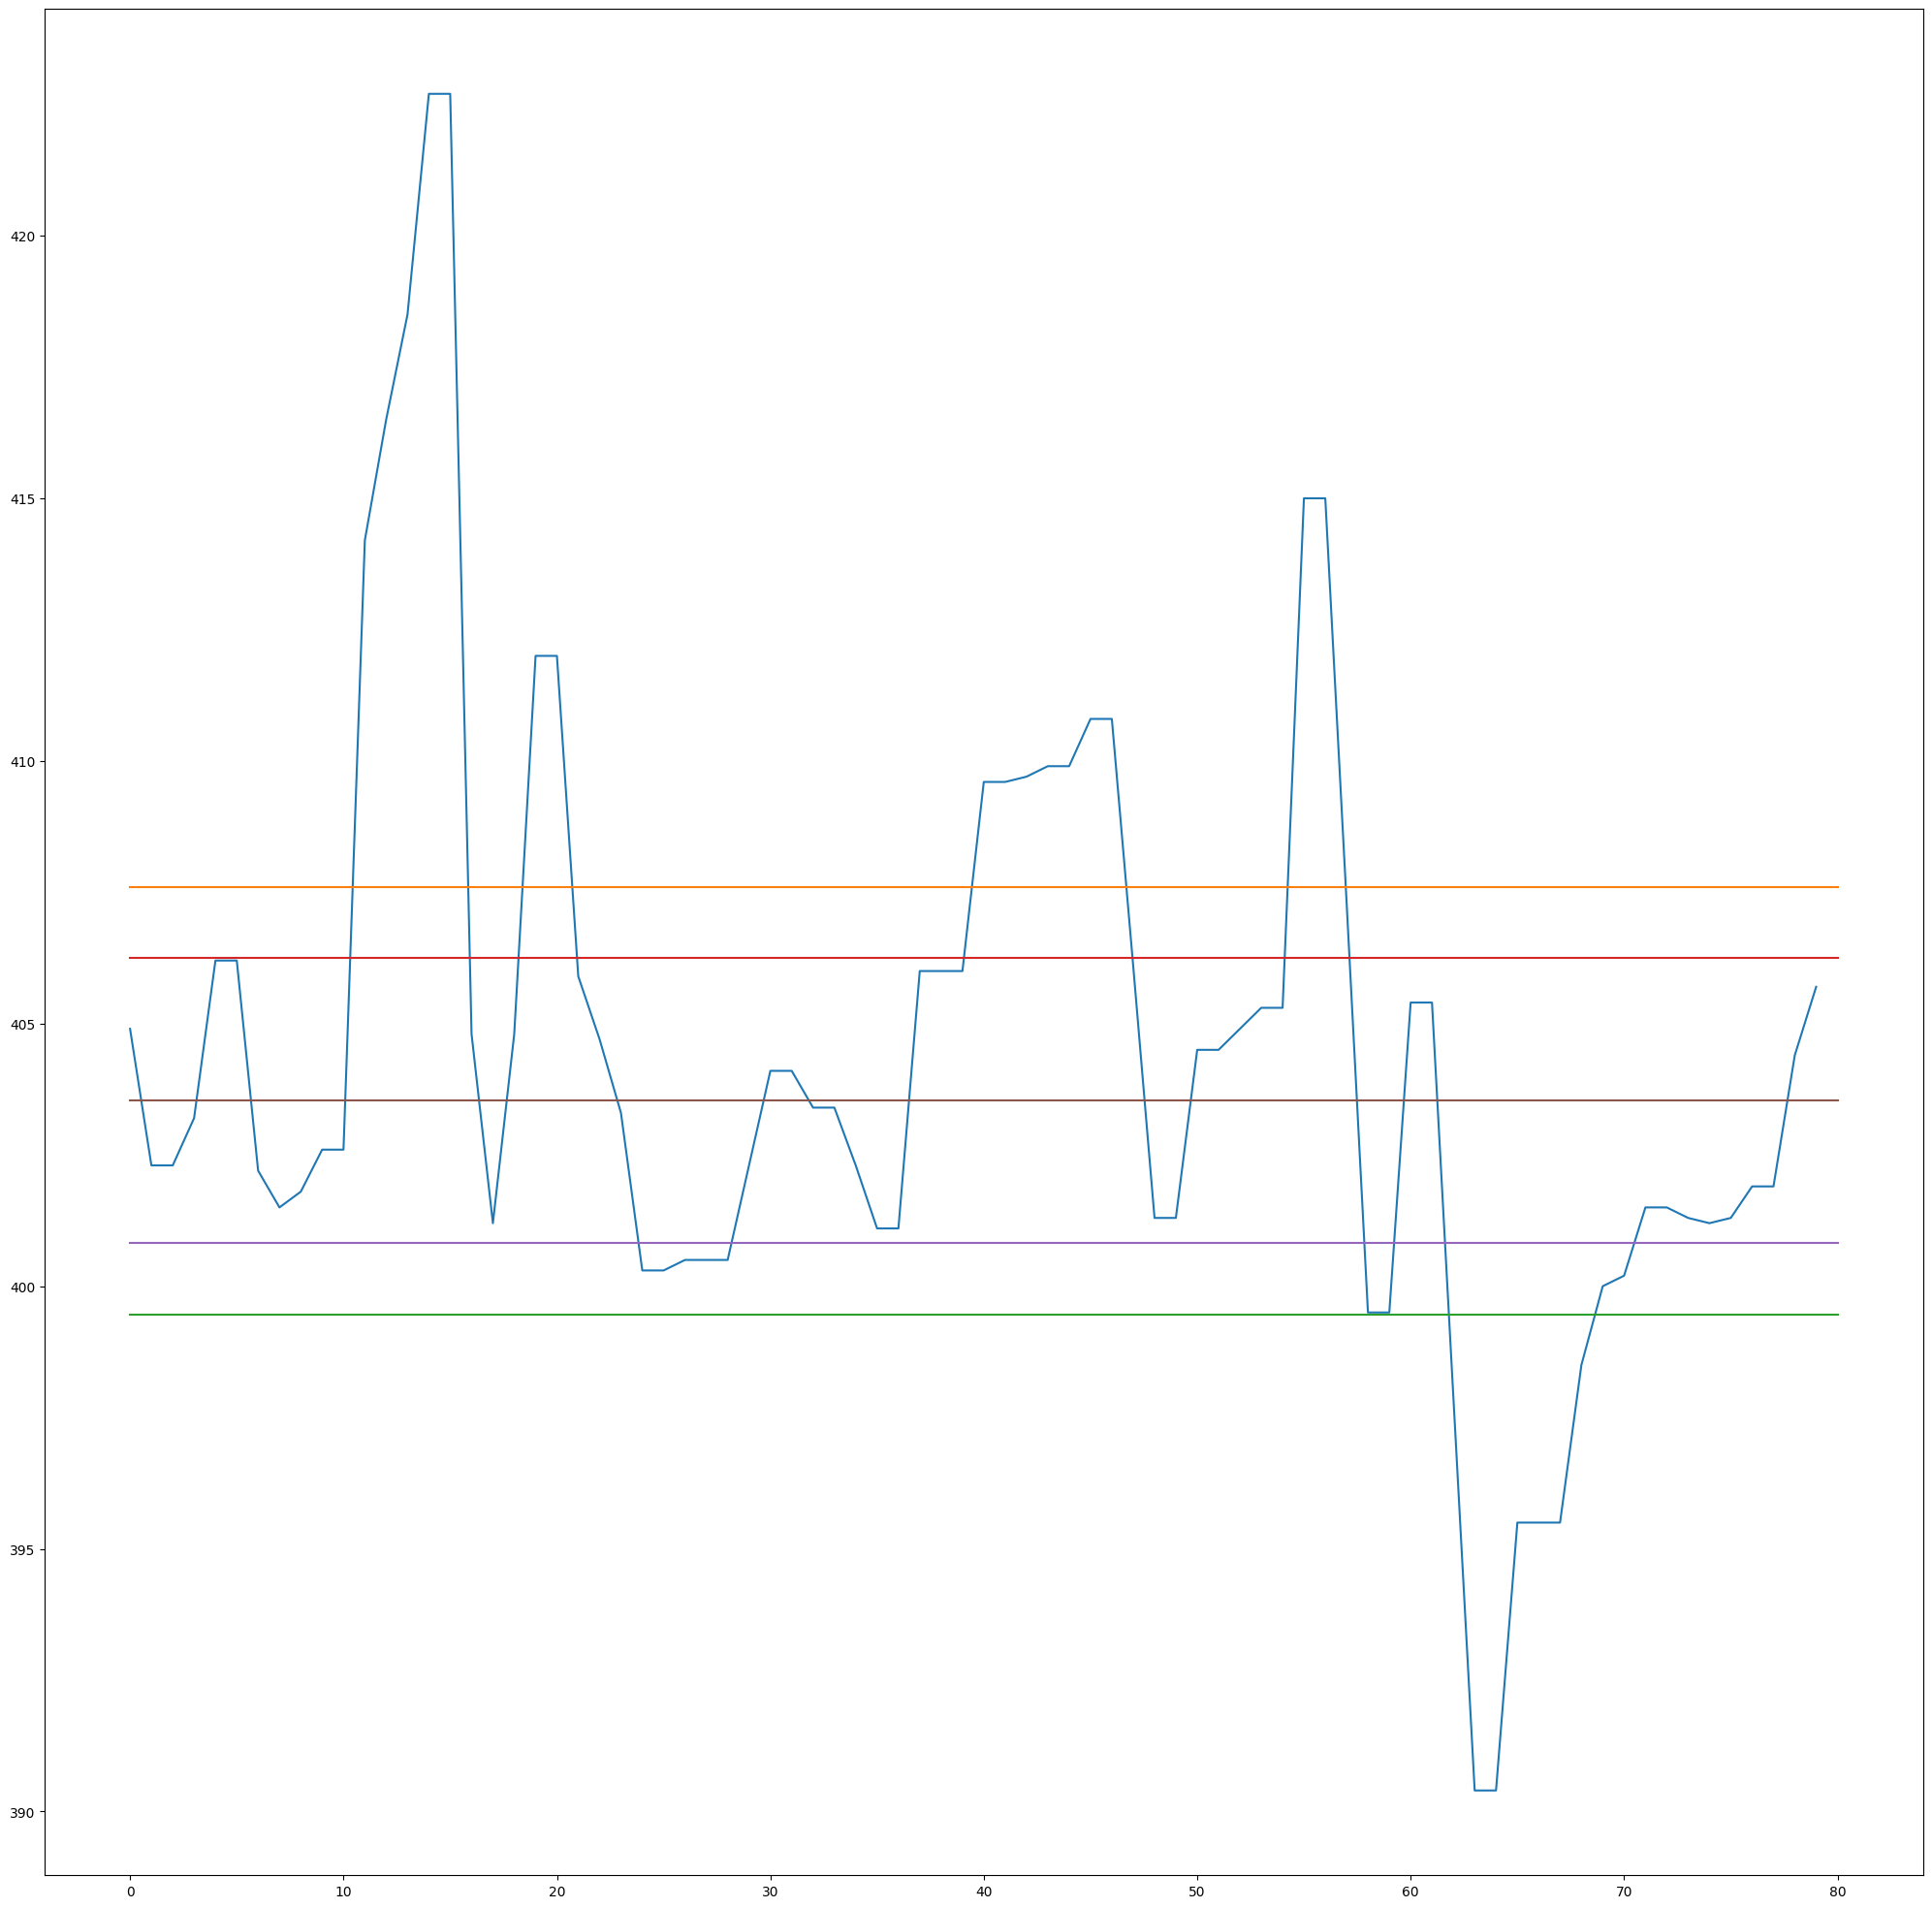

In [ ]:
#Individuals chart or i-chart
# Creating i-chart for monitoring level of contaminant in a chemical product
# Statistical Process Control By John Oakland
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from google.colab import files
uploaded = files.upload()

#import io
#data = pd.read_csv(io.BytesIO(uploaded['example2_exercise7.csv']))

# data from process that is in statistical control
xlsx = pd.ExcelFile("/content/example2_exercise7.xlsx")
data = pd.read_excel(xlsx, 'Sheet3',header=None)

data = np.array(data)
data = data[:,1]
data = data.reshape(len(data),1)
#print(data.shape)

xbar = np.mean(data,axis=0)
print(xbar)
mov_range = []
#mov_range.append(0)
# determining moving range
for i in range(0,len(data)-1):
  #print(i)
  xx = data[i:i+2,:]
  #print(xx)
  xmin = np.min(xx)
  xmax = np.max(xx)
  xrange = np.subtract(xmax,xmin)
  #print(xmin)
  #print(xmax)
  #print(xrange)

  mov_range.append(xrange)

mov_range = np.array(mov_range)
#print(len(mov_range))
print(mov_range)

# mean range
meanR = np.mean(mov_range,axis=0)
print(meanR)

# standard deviation
dn = 1.128   # Hartley's constant for sample size of 2
sigma = meanR/dn

# action and warning lines
UAL = xbar + 3*sigma
LAL = xbar-3*sigma

UWL = xbar + 2*sigma
LWL = xbar - 2*sigma

print(UAL)
print(LAL)

xlsx = pd.ExcelFile("/content/example2_exercise7.xlsx")
data = pd.read_excel(xlsx, 'Sheet1',header=None)

data = np.array(data)
data = data[:,1]
data = data.reshape(len(data),1)

# i-chart
plt.figure(figsize=(25,25))
plt.plot(data)
plt.plot(UAL * np.ones((len(data),1)))
plt.plot(LAL * np.ones((len(data),1)))
plt.plot(UWL * np.ones((len(data),1)))
plt.plot(LWL * np.ones((len(data),1)))
plt.plot(xbar* np.ones((len(data),1)))   # central or target line

  
# Create plots with pre-defined labels.
#fig, ax = plt.subplots()
#ax.plot(data, label='Measurements')
#ax.plot(UAL * np.ones((len(data),1)), label='UAL')
#ax.plot(LAL * np.ones((len(data),1)), label='LAL')
#ax.plot(UWL * np.ones((len(data),1)), label='UWL')
#ax.plot(LWL * np.ones((len(data),1)), label='LWL')
#ax.plot(xbar* np.ones((len(data),1)), label='CL')

#legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

# Put a nicer background color on the legend.
#legend.get_frame().set_facecolor('C1')

#plt.show()



In [ ]:
range